Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.


Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
Q3. Check for null values, identify categorical variables, and encode them.
Q4. Separate the features and target variables from the dataset.
Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.
Q6. Scale the dataset using an appropriate scaling technique.
Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.
Q8. Create a Sequential model in Keras and add the previously designed layers to it.
Q9. Print the summary of the model architecture.
Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
Q11. Compile the model with the specified loss function, optimizer, and metrics.
Q12. Fit the model to the training data using appropriate batch size and number of epochs.
Q13. Obtain the model's parameters (weights and biases).
Q14. Store the model's training history as a Pandas DataFrame.
Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from tensorflow.keras import models, layers
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


2023-06-29 18:10:14.239886: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.12.0
Keras version: 2.12.0


In [2]:
df = pd.read_csv('wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,855
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,NaN


there is no catogrical variable

In [5]:
df['quality'] = df['quality'].replace({'good': 1, 'bad': 0})

X = df.drop('quality', axis=1)
y= df.quality

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1,1)


from tensorflow.keras.callbacks import  EarlyStopping
import datetime



early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)


model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64*2, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64/2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val),callbacks=[early_stopping_callback])


model.summary()



Epoch 1/20
10/10 [==============================] - 1s 26ms/step - loss: 0.6587 - accuracy: 0.6411 - val_loss: 0.6046 - val_accuracy: 0.7500
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5772 - accuracy: 0.7248 - val_loss: 0.5125 - val_accuracy: 0.7969
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5316 - accuracy: 0.7357 - val_loss: 0.4610 - val_accuracy: 0.7500
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5107 - accuracy: 0.7428 - val_loss: 0.4720 - val_accuracy: 0.7656
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 0.4942 - accuracy: 0.7553 - val_loss: 0.4640 - val_accuracy: 0.7969
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4819 - accuracy: 0.7678 - val_loss: 0.4533 - val_accuracy: 0.7969
Epoch 7/20
10/10 [==============================] - 0s 7ms/step - loss: 0.4670 - accuracy: 0.7772 - val_loss: 0.4529 - val_accuracy: 0.7969
Epoch 8/20
10/10 [=

In [8]:
model_params = model.get_weights()

for layer_weights in model_params:
    print(layer_weights.shape)  # Print the shape of the layer's weights



(11, 64)
(64,)
(64, 64)
(64,)
(64, 128)
(128,)
(128, 64)
(64,)
(64, 32)
(32,)
(32, 1)
(1,)


In [9]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.658682,0.641126,0.604620,0.750000
1,0.577184,0.724785,0.512513,0.796875
2,0.531551,0.735731,0.461025,0.750000
3,0.510685,0.742768,0.472020,0.765625
4,0.494210,0.755278,0.463962,0.796875
5,0.481896,0.767787,0.453326,0.796875
6,0.467022,0.777170,0.452854,0.796875
7,0.458477,0.788116,0.466716,0.781250
8,0.449836,0.795152,0.461565,0.812500
9,0.439847,0.799062,0.479264,0.781250


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


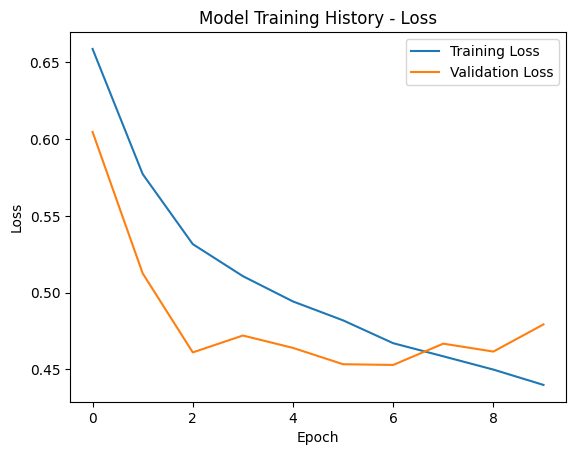

In [11]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training and validation loss
ax.plot(train_loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')

# Set the plot title and labels
ax.set_title('Model Training History - Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Add a legend
ax.legend()

# Show the plot
plt.show()


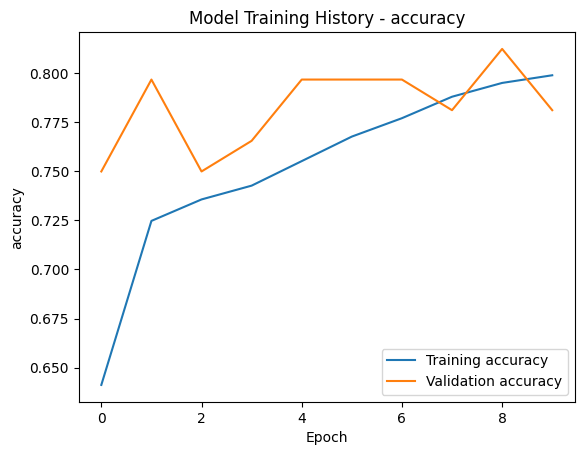

In [12]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training and validation loss
ax.plot(train_loss, label='Training accuracy')
ax.plot(val_loss, label='Validation accuracy')

# Set the plot title and labels
ax.set_title('Model Training History - accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [13]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


8/8 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7500
Test Loss: 0.5141849517822266
Test Accuracy: 0.75
